In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [2]:
store_df = pd.read_csv('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Final project /Time Series Data_Store/store_df.csv', index_col=0)
store_df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Sales,Quantity,Discount,Profit,Year,Month,Prep_time,Cost,Profit%,order year
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,261.9600,2,0.00,41.9136,2016,2016-11-01,3 days 00:00:00.000000000,220.0464,19.047619,2016
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,731.9400,3,0.00,219.5820,2016,2016-11-01,3 days 00:00:00.000000000,512.3580,42.857143,2016
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,...,14.6200,2,0.00,6.8714,2016,2016-06-01,4 days 00:00:00.000000000,7.7486,88.679245,2016
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,957.5775,5,0.45,-383.0310,2015,2015-10-01,7 days 00:00:00.000000000,1340.6085,-28.571429,2015
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,22.3680,2,0.20,2.5164,2015,2015-10-01,7 days 00:00:00.000000000,19.8516,12.676056,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,...,25.2480,3,0.20,4.1028,2014,2014-01-01,2 days 00:00:00.000000000,21.1452,19.402985,2014
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,91.9600,2,0.00,15.6332,2017,2017-02-01,5 days 00:00:00.000000000,76.3268,20.481928,2017
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,258.5760,2,0.20,19.3932,2017,2017-02-01,5 days 00:00:00.000000000,239.1828,8.108108,2017
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,29.6000,4,0.00,13.3200,2017,2017-02-01,5 days 00:00:00.000000000,16.2800,81.818182,2017


In [3]:
store_df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Prep_time', 'Cost',
       'Profit%', 'order year'],
      dtype='object')

In [4]:
store_df_final = store_df[['Profit', 'Cost', 'Discount','order year', 'Region', 'Category', 'Quantity', 'Prep_time', 'Ship Mode']]
store_df_final

,Profit,Cost,Discount,order year,Region,Category,Quantity,Prep_time,Ship Mode
0,41.9136,220.0464,0.00,2016,South,Furniture,2,3 days 00:00:00.000000000,Second Class
1,219.5820,512.3580,0.00,2016,South,Furniture,3,3 days 00:00:00.000000000,Second Class
2,6.8714,7.7486,0.00,2016,West,Office Supplies,2,4 days 00:00:00.000000000,Second Class
3,-383.0310,1340.6085,0.45,2015,South,Furniture,5,7 days 00:00:00.000000000,Standard Class
4,2.5164,19.8516,0.20,2015,South,Office Supplies,2,7 days 00:00:00.000000000,Standard Class
...,...,...,...,...,...,...,...,...,...
9989,4.1028,21.1452,0.20,2014,South,Furniture,3,2 days 00:00:00.000000000,Second Class
9990,15.6332,76.3268,0.00,2017,West,Furniture,2,5 days 00:00:00.000000000,Standard Class
9991,19.3932,239.1828,0.20,2017,West,Technology,2,5 days 00:00:00.000000000,Standard Class
9992,13.3200,16.2800,0.00,2017,West,Office Supplies,4,5 days 00:00:00.000000000,Standard Class


In [37]:
# one hot encode the segment column

df_clean = pd.get_dummies(data = store_df_final, columns=['Region', 'Category','Ship Mode'])
df_clean

,Profit,Cost,Discount,order year,Quantity,Prep_time,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,41.9136,220.0464,0.00,2016,2,3 days 00:00:00.000000000,0,0,1,0,1,0,0,0,0,1,0
1,219.5820,512.3580,0.00,2016,3,3 days 00:00:00.000000000,0,0,1,0,1,0,0,0,0,1,0
2,6.8714,7.7486,0.00,2016,2,4 days 00:00:00.000000000,0,0,0,1,0,1,0,0,0,1,0
3,-383.0310,1340.6085,0.45,2015,5,7 days 00:00:00.000000000,0,0,1,0,1,0,0,0,0,0,1
4,2.5164,19.8516,0.20,2015,2,7 days 00:00:00.000000000,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,4.1028,21.1452,0.20,2014,3,2 days 00:00:00.000000000,0,0,1,0,1,0,0,0,0,1,0
9990,15.6332,76.3268,0.00,2017,2,5 days 00:00:00.000000000,0,0,0,1,1,0,0,0,0,0,1
9991,19.3932,239.1828,0.20,2017,2,5 days 00:00:00.000000000,0,0,0,1,0,0,1,0,0,0,1
9992,13.3200,16.2800,0.00,2017,4,5 days 00:00:00.000000000,0,0,0,1,0,1,0,0,0,0,1


In [38]:
df_clean.head()

,Profit,Cost,Discount,order year,Quantity,Prep_time,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,41.9136,220.0464,0.00,2016,2,3 days 00:00:00.000000000,0,0,1,0,1,0,0,0,0,1,0
1,219.5820,512.3580,0.00,2016,3,3 days 00:00:00.000000000,0,0,1,0,1,0,0,0,0,1,0
2,6.8714,7.7486,0.00,2016,2,4 days 00:00:00.000000000,0,0,0,1,0,1,0,0,0,1,0
3,-383.0310,1340.6085,0.45,2015,5,7 days 00:00:00.000000000,0,0,1,0,1,0,0,0,0,0,1
4,2.5164,19.8516,0.20,2015,2,7 days 00:00:00.000000000,0,0,1,0,0,1,0,0,0,0,1


In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Profit                    9994 non-null   float64
 1   Cost                      9994 non-null   float64
 2   Discount                  9994 non-null   float64
 3   order year                9994 non-null   int64  
 4   Quantity                  9994 non-null   int64  
 5   Prep_time                 9994 non-null   object 
 6   Region_Central            9994 non-null   uint8  
 7   Region_East               9994 non-null   uint8  
 8   Region_South              9994 non-null   uint8  
 9   Region_West               9994 non-null   uint8  
 10  Category_Furniture        9994 non-null   uint8  
 11  Category_Office Supplies  9994 non-null   uint8  
 12  Category_Technology       9994 non-null   uint8  
 13  Ship Mode_First Class     9994 non-null   uint8  
 14  Ship Mod

In [40]:
corr = df_clean.corr()
corr

,Profit,Cost,Discount,order year,Quantity,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
Profit,1.000000,0.116757,-0.219487,0.004670,0.066253,-0.027167,0.009376,0.000377,0.015222,-0.044221,-0.043822,0.101825,0.005795,0.000624,0.001844,-0.006040
Cost,0.116757,1.000000,0.061448,-0.012937,0.199012,-0.002519,0.005730,0.009379,-0.010669,0.131863,-0.228662,0.149336,-0.003518,0.002580,0.004777,-0.002460
Discount,-0.219487,0.061448,1.000000,-0.002662,0.008623,0.224314,-0.033142,-0.019068,-0.155915,0.044552,0.006461,-0.055077,0.017368,-0.004422,-0.041214,0.022533
order year,0.004670,-0.012937,-0.002662,1.000000,-0.005810,0.003216,0.006724,-0.016921,0.003948,-0.004107,0.000150,0.004138,0.031889,0.018792,0.004107,-0.035461
Quantity,0.066253,0.199012,0.008623,-0.005810,1.000000,-0.002468,-0.017405,0.008528,0.012334,-0.001065,0.006436,-0.006991,-0.016870,-0.019391,0.005938,0.016580
Region_Central,-0.027167,-0.002519,0.224314,0.003216,-0.002468,1.000000,-0.347406,-0.242041,-0.377929,-0.006955,0.010322,-0.005686,-0.038399,-0.006495,0.007722,0.025019
Region_East,0.009376,0.005730,-0.033142,0.006724,-0.017405,-0.347406,1.000000,-0.277670,-0.433561,-0.001856,-0.002372,0.004945,0.031768,0.000255,-0.013588,-0.012522
Region_South,0.000377,0.009379,-0.019068,-0.016921,0.008528,-0.242041,-0.277670,1.000000,-0.302067,-0.007841,0.010100,-0.004472,-0.011516,-0.006011,0.009409,0.003655
Region_West,0.015222,-0.010669,-0.155915,0.003948,0.012334,-0.377929,-0.433561,-0.302067,1.000000,0.014282,-0.015025,0.003895,0.013122,0.010379,-0.001277,-0.013420
Category_Furniture,-0.044221,0.131863,0.044552,-0.004107,-0.001065,-0.006955,-0.001856,-0.007841,0.014282,1.000000,-0.639630,-0.247135,0.000403,0.004060,0.008788,-0.009267


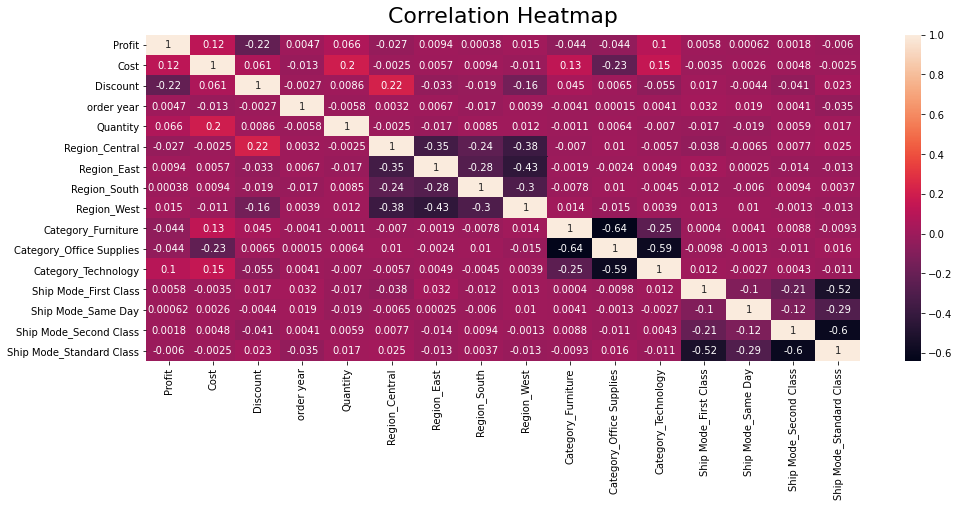

In [44]:
#  heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_clean.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':22}, pad=12);